# Importing necessary Libraries

In [2]:
import numpy as np
import tensorflow.keras 
from keras.layers import Layer, Conv2D, MaxPooling2D, Dense, Flatten

# Loading Datasets For Training and Testing

In [3]:
X_train = np.loadtxt("input.csv", delimiter=",")
y_train = np.loadtxt("labels.csv", delimiter=",")

X_test = np.loadtxt("input_test.csv", delimiter=",")
y_test = np.loadtxt("labels_test.csv", delimiter=",")

In [4]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (2000, 30000)
X_test:  (400, 30000)
y_train:  (2000,)
y_test:  (400,)


# Reshaping Datasets

In [5]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

In [6]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (2000, 100, 100, 3)
X_test:  (400, 100, 100, 3)
y_train:  (2000, 1)
y_test:  (400, 1)


# Standardizing our Data

In [7]:
print(X_train.max())
print(X_test.max())

255.0
255.0


In [8]:
X_train = X_train/255
X_test = X_test/255

# Plotting a sample of our Data

In [9]:
import matplotlib.pyplot as plt
import random

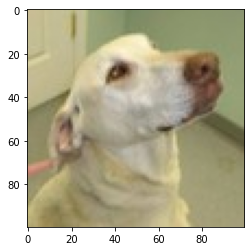

In [10]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])

# Building Convolution Neural Network

In [12]:
import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
model = keras.Sequential([
    layers.InputLayer(input_shape=[100, 100, 3]),
    
    # Data Augmentation
    preprocessing.RandomContrast(factor=0.10),
    #preprocessing.RandomFlip(mode='horizontal'),
    preprocessing.RandomRotation(factor=0.10),

    # Block One
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Two
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Head
    layers.BatchNormalization(renorm=True),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

# Compiling Model

In [13]:
optimizer = tensorflow.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

# Fitting the Model

In [14]:
history = model.fit(x = X_train, y = y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
63/63 [==============================] - 137s 2s/step - loss: 0.6915 - binary_accuracy: 0.5095 - val_loss: 0.6680 - val_binary_accuracy: 0.5900
Epoch 2/30
63/63 [==============================] - 142s 2s/step - loss: 0.6578 - binary_accuracy: 0.6070 - val_loss: 0.6360 - val_binary_accuracy: 0.6000
Epoch 3/30
63/63 [==============================] - 131s 2s/step - loss: 0.6833 - binary_accuracy: 0.5760 - val_loss: 0.6776 - val_binary_accuracy: 0.5675
Epoch 4/30
63/63 [==============================] - 124s 2s/step - loss: 0.6655 - binary_accuracy: 0.5915 - val_loss: 0.6079 - val_binary_accuracy: 0.5875
Epoch 5/30
63/63 [==============================] - 138s 2s/step - loss: 0.6862 - binary_accuracy: 0.5890 - val_loss: 0.6134 - val_binary_accuracy: 0.6350
Epoch 6/30
63/63 [==============================] - 147s 2s/step - loss: 0.6424 - binary_accuracy: 0.6175 - val_loss: 0.6537 - val_binary_accuracy: 0.5300
Epoch 7/30
63/63 [==============================] - 125s 2s/step - los

# Plotting Learnigg Curve 

<AxesSubplot:>

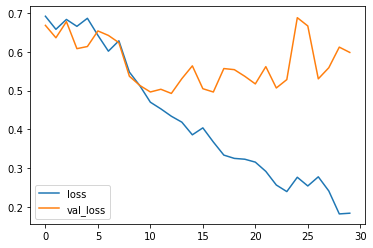

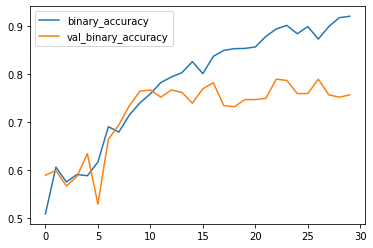

In [18]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ["loss", "val_loss"]].plot()
history_frame.loc[:, ["binary_accuracy", "val_binary_accuracy"]].plot()

# Making a Prediction on a random Sample of our Data

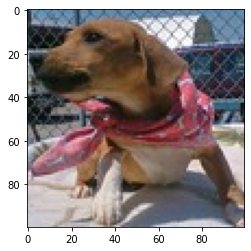

1/1 [==============================] - 0s 39ms/step
This is a dog


In [23]:
sample = random.randint(0, len(y_test))
plt.imshow(X_test[sample, :])
plt.show()
prediction = model.predict(X_test[sample, :].reshape(1, 100, 100, 3))
prediction = prediction > 0.5

if (prediction == 0):
    pred = "dog"
else:
    pred = "cat"
print(f"This is a {pred}")

# Obtaining the Acuracy of our Model

In [29]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {score[0]}")
print(f"Accuracy: {score[1]}")

Loss: 0.5981864333152771
Accuracy: 0.7574999928474426
